In [11]:
from environment.coord import Coord
from environment.circle import Circle
from environment.path import Path
from two_threats import two_threats_shortest_path_with_budget_constraint_discretized_mid_targets
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

C:\Users\fogle\AppData\Local\Temp\ipykernel_13816\3915392745.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
budget = 300
partition = [0.5, 0.5]

source, target = Coord(-50, 100), Coord(700, 0)

center1, radius1 = Coord(100,100), 100
center2, radius2 = Coord(500,-100), 150

circle1 = Circle(center1, radius1)
circle2 = Circle(center2, radius2)

In [3]:
path, length, risk = two_threats_shortest_path_with_budget_constraint_discretized_mid_targets(source, target, circle1, circle2, budget, partition)

planning with risk limit 150.0 via one circle...
case 2: the risk limit 150.0 is over the contact points distance 141.44
planning with risk limit 150.0 via one circle...
case 2: the risk limit 150.0 is over the contact points distance 36.97
planning with risk limit 150.0 via one circle...
case 2: the risk limit 150.0 is over the contact points distance 144.04
planning with risk limit 150.0 via one circle...
case 2: the risk limit 150.0 is over the contact points distance 34.77
planning with risk limit 150.0 via one circle...
case 2: the risk limit 150.0 is over the contact points distance 146.16
planning with risk limit 150.0 via one circle...
case 2: the risk limit 150.0 is over the contact points distance 32.56
planning with risk limit 150.0 via one circle...
case 2: the risk limit 150.0 is over the contact points distance 147.87
planning with risk limit 150.0 via one circle...
case 2: the risk limit 150.0 is over the contact points distance 30.33
planning with risk limit 150.0 via o

In [4]:
length

773.176188792894

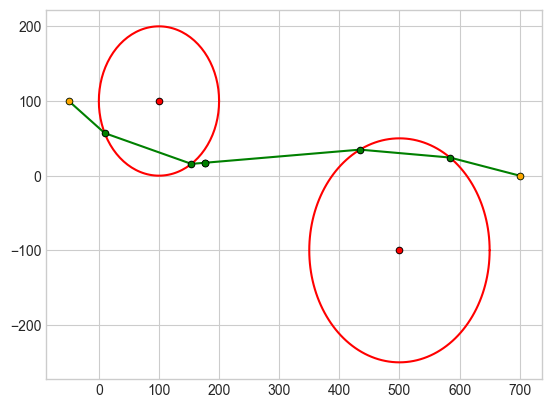

In [6]:
circle1.plot()
circle2.plot()
Path(path).plot()

# exp1

In [19]:
budget = 200

source, target = Coord(-50, 100), Coord(700, 0)

center1, radius1 = Coord(100,100), 100
center2, radius2 = Coord(500,-100), 150

circle1 = Circle(center1, radius1)
circle2 = Circle(center2, radius2)

In [20]:
paths = []
lengths = []
risks =[]
b1s = list(np.arange(0,1,0.1))
for b1 in b1s:
    path, length, risk = two_threats_shortest_path_with_budget_constraint_discretized_mid_targets(source, target, circle1, circle2, budget, (b1, budget - b1))
    paths.append(path)
    lengths.append(length)
    risks.append(risk)

planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 141.44
planning with risk limit 40000.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 144.04
planning with risk limit 40000.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 146.16
planning with risk limit 40000.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 147.87
planning with risk limit 40000.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under t

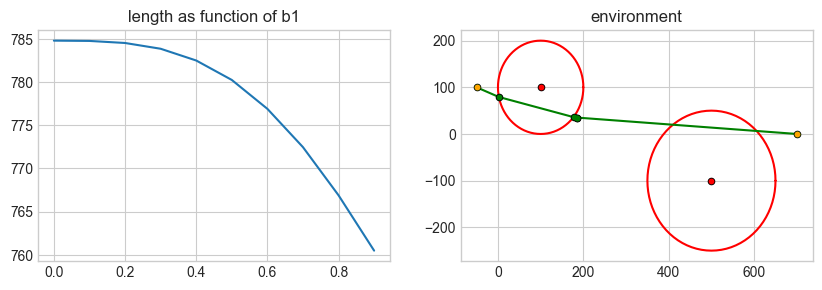

In [21]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('length as function of b1')
plt.plot(b1s, lengths)

plt.subplot(1,2,2)
plt.title('environment')
circle1.plot()
circle2.plot()
Path(path).plot()

# exp2

In [25]:
budget = 150

source, target = Coord(-100, 100), Coord(700, -100)

center1, radius1 = Coord(150, 50), 200
center2, radius2 = Coord(500,-100), 150

circle1 = Circle(center1, radius1)
circle2 = Circle(center2, radius2)

In [26]:
paths = []
lengths = []
risks =[]
b1s = list(np.arange(0,1,0.1))
for b1 in b1s:
    path, length, risk = two_threats_shortest_path_with_budget_constraint_discretized_mid_targets(source, target, circle1, circle2, budget, (b1, budget - b1))
    paths.append(path)
    lengths.append(length)
    risks.append(risk)

planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 343.63
planning with risk limit 22500.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 345.7
planning with risk limit 22500.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 347.5
planning with risk limit 22500.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the contact points distance 349.04
planning with risk limit 22500.0 via one circle...
case 1: straight line between source and target is possible
planning with risk limit 0.0 via one circle...
case 3: the risk limit 0.0 is under the

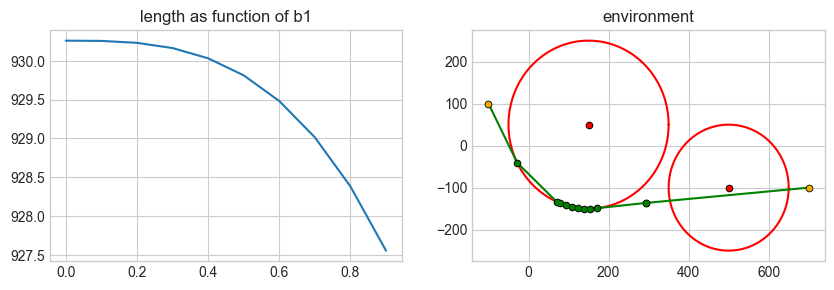

In [27]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('length as function of b1')
plt.plot(b1s, lengths)

plt.subplot(1,2,2)
plt.title('environment')
circle1.plot()
circle2.plot()
Path(path).plot()